### HW04 Static Analysis

Since we cannot share real malware binary with you. We give you the pefile analysis result (by calling pefile_dump() ) and save the result in a dictionary. You have to practice writing a parser before analyzing the given pefile dump file.

### Download data


In [0]:
# Here is the dump dictionary.
!wget https://drive.google.com/uc?id=1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9 -O pef_dumpdict_40.pickle

--2020-04-13 14:03:47--  https://drive.google.com/uc?id=1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9
Resolving drive.google.com (drive.google.com)... 74.125.203.100, 74.125.203.102, 74.125.203.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lqs349u5vkqsup1vr39gpjmfk1jm2qpd/1586786625000/17174434063503717705/*/1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9 [following]
--2020-04-13 14:03:48--  https://doc-08-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lqs349u5vkqsup1vr39gpjmfk1jm2qpd/1586786625000/17174434063503717705/*/1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9
Resolving doc-08-38-docs.googleusercontent.com (doc-08-38-docs.googleusercontent.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting to doc-08-38-docs.googleusercontent.com (doc-08-38-docs.googleusercontent.com)|74.125

In [0]:
!apt-get install upx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'upx-ucl' instead of 'upx'
The following additional packages will be installed:
  libucl1
The following NEW packages will be installed:
  libucl1 upx-ucl
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 401 kB of archives.
After this operation, 2,083 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libucl1 amd64 1.03+repack-4 [23.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 upx-ucl amd64 3.94-4 [377 kB]
Fetched 401 kB in 2s (194 kB/s)
Selecting previously unselected package libucl1:amd64.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libucl1_1.03+repack-4_amd64.deb ...
Unpacking libucl1:amd64 (1.03+repack-4) ...
Selecting previously unselected package upx-ucl.
Preparing to unpack .../upx-ucl_3.94-4_amd64.deb ...
Unpacking up

In [0]:
# The size should be 414677 bytes.
!ls -al

total 424
drwxr-xr-x 1 root root   4096 Apr 13 14:03 .
drwxr-xr-x 1 root root   4096 Apr 13 14:01 ..
drwxr-xr-x 1 root root   4096 Apr  9 16:10 .config
-rw-r--r-- 1 root root 414677 Apr 13 14:03 pef_dumpdict_40.pickle
drwxr-xr-x 1 root root   4096 Apr  3 16:24 sample_data


In [0]:
# It is stored in a pickle file.
# You can retrive it by using the following code.

import pickle
import os 

with open("/content/pef_dumpdict_40.pickle", 'rb') as fd:
  pef_dumpdicts = pickle.load(fd)

### A dump file example


In [0]:
# Get a 32-bit putty pe file
!wget https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe -O putty32.exe

--2020-04-13 14:04:15--  https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.73/w32/putty.exe [following]
--2020-04-13 14:04:16--  https://the.earth.li/~sgtatham/putty/0.73/w32/putty.exe
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 1096080 (1.0M) [application/x-msdos-program]
Saving to: ‘putty32.exe’

putty32.exe         100%[===================>]   1.04M   701KB/s    in 1.5s    

2020-04-13 14:04:18 (701 KB/s) - ‘putty32.exe’ saved [1096080/1096080]



In [0]:
!pip install pefile

     |████████████████████████████████| 71kB 2.2MB/s 
  Created wheel for pefile: filename=pefile-2019.4.18-cp36-none-any.whl size=60824 sha256=8d03ef549566c58c852f6c54abdfdbd291003ceaa21f3bbf3f4accfd2f7f7128
  Stored in directory: /root/.cache/pip/wheels/1c/a1/95/4f33011a0c013c872fe6f0f364dc463a2588120820e40a30d8
Successfully built pefile


In [0]:
import pefile

pef = pefile.PE("/content/putty32.exe", True)
dump_dict = pef.dump_dict()

In [0]:
# a pefile dump dictionary has some information
# they are stored in different "keys"
print(dump_dict.keys())

dict_keys(['DOS_HEADER', 'NT_HEADERS', 'FILE_HEADER', 'Flags', 'OPTIONAL_HEADER', 'DllCharacteristics', 'PE Sections', 'Directories', 'Version Information', 'Imported symbols', 'Resource directory', 'LOAD_CONFIG', 'Base relocations'])


In [0]:
# show one of the data in 'DOS_HEADER' key
# and it looks like a python dictionary
# you can put this data in a json or a dictionaary structure for further analysis
import pprint
pprint.pprint(dump_dict['DllCharacteristics'])

['IMAGE_DLLCHARACTERISTICS_DYNAMIC_BASE',
 'IMAGE_DLLCHARACTERISTICS_NX_COMPAT',
 'IMAGE_DLLCHARACTERISTICS_TERMINAL_SERVER_AWARE']


In [0]:
# for eample, I put it in a dictionaty
# now I can easily retrive the info stored in it by keys
dos_header_dict = dict(dump_dict['DOS_HEADER'])
print(dos_header_dict.keys())

print(dos_header_dict['Structure'])  # name
print(dos_header_dict['e_magic'])  # e_magic

dict_keys(['Structure', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc', 'e_ovno', 'e_res', 'e_oemid', 'e_oeminfo', 'e_res2', 'e_lfanew'])
IMAGE_DOS_HEADER
{'FileOffset': 0, 'Offset': 0, 'Value': 23117}


In [0]:
# another example

file_header_dict = dict(dump_dict['FILE_HEADER'])
print(file_header_dict.keys())

print(file_header_dict['Machine'])
print(file_header_dict['NumberOfSections'])
print(file_header_dict['TimeDateStamp'])

dict_keys(['Structure', 'Machine', 'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable', 'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics'])
{'FileOffset': 124, 'Offset': 0, 'Value': 332}
{'FileOffset': 126, 'Offset': 2, 'Value': 7}
{'FileOffset': 128, 'Offset': 4, 'Value': '0x5D873EBE [Sun Sep 22 09:28:30 2019 UTC]'}


In [0]:
# You can even print all dump_dict to find some valueable infomation.
# pprint stands for pretty print, which makes you easier to view the data
import pprint
pprint.pprint(dump_dict['Imported symbols']) # change this to other keys

[[{'Characteristics': {'FileOffset': 729424, 'Offset': 0, 'Value': 734724},
   'FirstThunk': {'FileOffset': 729440, 'Offset': 16, 'Value': 736044},
   'ForwarderChain': {'FileOffset': 729432, 'Offset': 8, 'Value': 0},
   'Name': {'FileOffset': 729436, 'Offset': 12, 'Value': 743028},
   'OriginalFirstThunk': {'FileOffset': 729424, 'Offset': 0, 'Value': 734724},
   'Structure': 'IMAGE_IMPORT_DESCRIPTOR',
   'TimeDateStamp': {'FileOffset': 729428,
                     'Offset': 4,
                     'Value': '0x0        [Thu Jan  1 00:00:00 1970 UTC]'}},
  {'DLL': b'GDI32.dll', 'Hint': 41, 'Name': b'CreateBitmap'},
  {'DLL': b'GDI32.dll', 'Hint': 48, 'Name': b'CreateCompatibleBitmap'},
  {'DLL': b'GDI32.dll', 'Hint': 49, 'Name': b'CreateCompatibleDC'},
  {'DLL': b'GDI32.dll', 'Hint': 61, 'Name': b'CreateFontA'},
  {'DLL': b'GDI32.dll', 'Hint': 62, 'Name': b'CreateFontIndirectA'},
  {'DLL': b'GDI32.dll', 'Hint': 74, 'Name': b'CreatePalette'},
  {'DLL': b'GDI32.dll', 'Hint': 76, 'Name': b

### Analyze the downloaded data

In [0]:
# Now pef_dumpdict is what we want you to analyze.
# It combines 40 malware's pefile.dump_dict().

print(len(pef_dumpdicts))

40


In [0]:
# The id of the 40 malwares are
for key in pef_dumpdicts.keys():
  print(key)

07edeebc14b053fffdfb4dcc08959360
0cfab9961285ab6e04f449c6d09cec37
2c1e90810ca30865cbf4440118c4aa0f
412c8d4d6afc88391e6dad508106681a
656f628856a62f1dc14748bff4cee2e5
8595c554539a172534c95222260650e5
88b666fd4ef1c21f4051ad3f859ee5bd
8aa66c2a430c3545c542e8419de13385
e776d8d8d187bdb68f41dc9ccfc86444
ed1304342c5794cb0a55840253793b45
2650e58a609438ba18706f539b49a6af
2a5932a800123709eff21dbd2310e090
4271ba51876b1e931dd55b2ccff25789
52cae62ada8b02adae128e35686cbc16
774b71a232568ca7ea09c0a26b82f8e5
7b57508defc0934c69b98544b4bac185
8081b6b58cc3372ad62a5d8b6ce09c0b
8e6d8d46e4a7482b9475e6c5b211dc61
b4e89348aa9b635b8edce746f8231303
e0ad769d1bd2b9b6444796f99b52a43f
0c6e68a34804df907df26d7139b1f052
0e751a5b6db31895c283ddd9757477de
0f74a58af435599ec94eff2b72d5e55e
1d0ce31c6d7129a74e2921e8d161c752
2cceeae738cae520544e9d9fda9ca30e
2ea5285f04bc9a0b3008165779a382ec
2f45c7132f623cd7caea6d7965d53a0f
3b569cd1c63b83446420dd798a8622b7
3f07e530430d1d450bfeaf0a595109b1
4aa9b2104ac7c7602c4258a0f7ce2b44
17af47cdfd

2 3072:i+lkRciNwRmzbJftq6xaqOtnqpnb7LNhGX:SRciSuNwnqAX

In [0]:
# so the fist dump_dict is
first_dict = pef_dumpdicts['07edeebc14b053fffdfb4dcc08959360']

# you can now access the data you want
# for example print all sections and their info.
for sec in first_dict['PE Sections']:
  print(sec)

# or like this (as what we see in pefile demonstration)
print("\nName, Misc_VirtualSize, SizeOfRawData, Entropy, MD5")
for sec in first_dict['PE Sections']:
  print(sec['Name']['Value'], sec['Misc_VirtualSize']['Value'], sec['SizeOfRawData']['Value'], sec['Entropy'], sec['MD5'])

{'Structure': 'IMAGE_SECTION_HEADER', 'Name': {'FileOffset': 464, 'Offset': 0, 'Value': 'UPX0\\x00\\x00\\x00\\x00'}, 'Misc': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'Misc_PhysicalAddress': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'Misc_VirtualSize': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'VirtualAddress': {'FileOffset': 476, 'Offset': 12, 'Value': 4096}, 'SizeOfRawData': {'FileOffset': 480, 'Offset': 16, 'Value': 0}, 'PointerToRawData': {'FileOffset': 484, 'Offset': 20, 'Value': 1024}, 'PointerToRelocations': {'FileOffset': 488, 'Offset': 24, 'Value': 0}, 'PointerToLinenumbers': {'FileOffset': 492, 'Offset': 28, 'Value': 0}, 'NumberOfRelocations': {'FileOffset': 496, 'Offset': 32, 'Value': 0}, 'NumberOfLinenumbers': {'FileOffset': 498, 'Offset': 34, 'Value': 0}, 'Characteristics': {'FileOffset': 500, 'Offset': 36, 'Value': 3758096512}, 'Flags': ['IMAGE_SCN_CNT_UNINITIALIZED_DATA', 'IMAGE_SCN_MEM_EXECUTE', 'IMAGE_SCN_MEM_READ', 'IMAGE_SCN_MEM_WRITE'], 'Entr

In [0]:
# Here you can output the dll and windows api used by a pe file
# You may print dump_dict['Imported symbols'] first
# and try to locate the info you want to retrive.

api_dict = dict()
for records in first_dict['Imported symbols']:
  for record in records:
    if 'Name' in record:
      if isinstance(record['Name'], bytes):
        dll = record['DLL'].decode("ascii")
        name = record['Name'].decode("ascii")
        if dll not in api_dict:
          api_dict[dll] = set()
        api_dict[dll].add(name)

for dll in api_dict:
  print(dll)
  print("", api_dict[dll])

KERNEL32.DLL
 {'ExitProcess', 'LoadLibraryA', 'GetProcAddress'}
ADVAPI32.dll
 {'RegCloseKey'}
MSVCRT.dll
 {'rand'}
USER32.dll
 {'wsprintfA'}
WININET.dll
 {'InternetOpenA'}


### Extract more information

Now its your turn.
Try to buld a feature table for these 40 malwares.
Here is an example for api call.

In [0]:
api_set = set()
for key in pef_dumpdicts.keys(): # iter 40 malwares
  pef_dump_dict = pef_dumpdicts[key]
  for records in pef_dump_dict['Imported symbols']:
    for record in records:
      if 'Name' in record:
        if isinstance(record['Name'], bytes):r
          name = record['Name'].decode("ascii")
          api_set.add(name)

api_list = list(api_set) 

In [0]:
api_list

['rand',
 'InternetOpenA',
 'wsprintfA',
 'LoadLibraryA',
 'RegCloseKey',
 'GetProcAddress',
 'ExitProcess']

Now you find an interesting thing, that all 40 malwares calls these 7 APIs. So it is impossible to distinguish them by using these 7 APIs. So please try to use some other features.

Hint #1: these malwares are packed. UPX may unpacked them.

Hint #2: these 40 malware samples are from 4 families. Can you classify or cluster them into 4 groups?

### Your solution

- PE Section
  - Entropy

In [0]:
pef_dumpdicts.keys()

dict_keys(['07edeebc14b053fffdfb4dcc08959360', '0cfab9961285ab6e04f449c6d09cec37', '2c1e90810ca30865cbf4440118c4aa0f', '412c8d4d6afc88391e6dad508106681a', '656f628856a62f1dc14748bff4cee2e5', '8595c554539a172534c95222260650e5', '88b666fd4ef1c21f4051ad3f859ee5bd', '8aa66c2a430c3545c542e8419de13385', 'e776d8d8d187bdb68f41dc9ccfc86444', 'ed1304342c5794cb0a55840253793b45', '2650e58a609438ba18706f539b49a6af', '2a5932a800123709eff21dbd2310e090', '4271ba51876b1e931dd55b2ccff25789', '52cae62ada8b02adae128e35686cbc16', '774b71a232568ca7ea09c0a26b82f8e5', '7b57508defc0934c69b98544b4bac185', '8081b6b58cc3372ad62a5d8b6ce09c0b', '8e6d8d46e4a7482b9475e6c5b211dc61', 'b4e89348aa9b635b8edce746f8231303', 'e0ad769d1bd2b9b6444796f99b52a43f', '0c6e68a34804df907df26d7139b1f052', '0e751a5b6db31895c283ddd9757477de', '0f74a58af435599ec94eff2b72d5e55e', '1d0ce31c6d7129a74e2921e8d161c752', '2cceeae738cae520544e9d9fda9ca30e', '2ea5285f04bc9a0b3008165779a382ec', '2f45c7132f623cd7caea6d7965d53a0f', '3b569cd1c63b8344

In [0]:
import re
pef_dump_dict = pef_dumpdicts['07edeebc14b053fffdfb4dcc08959360']
dt = pef_dump_dict['FILE_HEADER']['TimeDateStamp']['Value']

if re.match('\[.*\]', dt):
  t = re.match('\[.*\]', dt).group(0)

In [0]:
pef_dumpdicts['07edeebc14b053fffdfb4dcc08959360']['OPTIONAL_HEADER']

{'AddressOfEntryPoint': {'FileOffset': 256, 'Offset': 16, 'Value': 33280},
 'BaseOfCode': {'FileOffset': 260, 'Offset': 20, 'Value': 24576},
 'BaseOfData': {'FileOffset': 264, 'Offset': 24, 'Value': 32768},
 'CheckSum': {'FileOffset': 304, 'Offset': 64, 'Value': 195901},
 'DllCharacteristics': {'FileOffset': 310, 'Offset': 70, 'Value': 0},
 'FileAlignment': {'FileOffset': 276, 'Offset': 36, 'Value': 512},
 'ImageBase': {'FileOffset': 268, 'Offset': 28, 'Value': 826408960},
 'LoaderFlags': {'FileOffset': 328, 'Offset': 88, 'Value': 0},
 'Magic': {'FileOffset': 240, 'Offset': 0, 'Value': 267},
 'MajorImageVersion': {'FileOffset': 284, 'Offset': 44, 'Value': 0},
 'MajorLinkerVersion': {'FileOffset': 242, 'Offset': 2, 'Value': 6},
 'MajorOperatingSystemVersion': {'FileOffset': 280, 'Offset': 40, 'Value': 4},
 'MajorSubsystemVersion': {'FileOffset': 288, 'Offset': 48, 'Value': 4},
 'MinorImageVersion': {'FileOffset': 286, 'Offset': 46, 'Value': 0},
 'MinorLinkerVersion': {'FileOffset': 243,

In [0]:
from datetime import datetime
import re 

feature_list = []
for key in pef_dumpdicts.keys():
  pef_dump_dict = pef_dumpdicts[key]

  # FILE HEADER
  # TimeDateStamp
  try:
    dt = pef_dump_dict['FILE_HEADER']['TimeDateStamp']['Value']
    dt = re.sub('\[|\]', '', re.search('\[.*\]', dt).group(0))
    dt = datetime.strptime(dt, '%a %b %d %H:%M:%S %Y %Z').timestamp()
  except:
    print('Time Stamp format Error')

  # OPTIONAL HEADER
  # ib = pef_dump_dict['OPTIONAL_HEADER']['ImageBase']['Value']
  checksum = pef_dump_dict['OPTIONAL_HEADER']['CheckSum']['Value']
  aoep = pef_dump_dict['OPTIONAL_HEADER']['AddressOfEntryPoint']['Value']

  # PE Sections 
  # max Entropy
  entropy = []
  for pes in pef_dump_dict['PE Sections']:
    entropy.append(pes['Entropy'])

  data = {
      'key': key,
      'datetime': dt, 
      #'ImageBase': ib,
      'checksum': checksum,
      'EntryPointAddress': aoep,
      'entropy': max(entropy),
  }
  feature_list.append(data)

In [0]:
import pandas as pd

df = pd.DataFrame(feature_list)
df

,key,datetime,checksum,EntryPointAddress,entropy
0,07edeebc14b053fffdfb4dcc08959360,1.088239e+09,195901,33280,7.902853
1,0cfab9961285ab6e04f449c6d09cec37,1.088239e+09,195901,33280,7.902853
2,2c1e90810ca30865cbf4440118c4aa0f,1.088239e+09,195901,33280,7.902853
3,412c8d4d6afc88391e6dad508106681a,1.088239e+09,195901,33280,7.902853
4,656f628856a62f1dc14748bff4cee2e5,1.088239e+09,195901,33280,7.902853
5,8595c554539a172534c95222260650e5,1.088239e+09,195901,33280,7.902853
6,88b666fd4ef1c21f4051ad3f859ee5bd,1.088239e+09,195901,33280,7.902853
7,8aa66c2a430c3545c542e8419de13385,1.088239e+09,195901,33280,7.902853
8,e776d8d8d187bdb68f41dc9ccfc86444,1.088239e+09,195901,33280,7.902853
9,ed1304342c5794cb0a55840253793b45,1.088239e+09,195901,33280,7.902853


note:

只有 6db56b93657419ea946b2db489d88908 的 ImageBase 是 826474496

## 分群

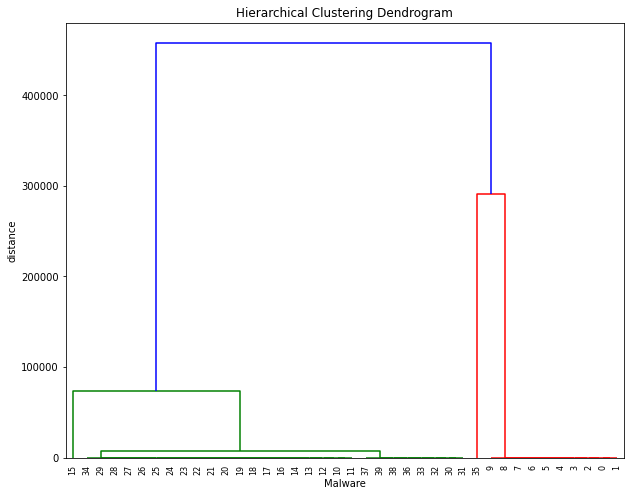

In [0]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

X = df[['datetime', 'checksum', 'EntryPointAddress', 'entropy']]
distance_mat = pdist(X)
hc = hierarchy.linkage(X, 'weighted')
plt.figure(figsize=(10,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Malware')
plt.ylabel('distance')

hierarchy.dendrogram(hc, truncate_mode='lastp', p=150,leaf_rotation=90.)
plt.show()

In [0]:
cutree = hierarchy.cut_tree(hc, n_clusters=4)
print('Result of Hierarchy clustering：\n', cutree.reshape(1, -1)[0])

Result of Hierarchy clustering：
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1
 1 1 1]
